### I haven't uploaded the dataset because of it's large size (144MB), so you need to place 'creditcard.csv' in the directory of this notebook
###### Name    :	Syed Karar Hussain Shahsain Shah
###### Roll No :	PIAIC145366
###### Email	 :    karar.shah2015@gmail.com
###### Course :    AI
###### Session:    No.1 (Respect Sir Nasir Hussain)(Saturday)

# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [1]:
import pandas as pd
import numpy as np

#customizing output of DataFrame
pd.set_option('display.max_columns', 35) 
pd.set_option('display.max_rows', 1000)  

In [2]:
d = pd.read_csv('creditcard.csv')

In [3]:
d

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
d.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

###### Seprating valid and fraud samples(rows)

In [6]:
fraud = d[d.Class == 1]
valid_all = d[d.Class == 0]

###### Randomly sampling valid samples(rows) equal to length of fraud dataset 

In [7]:
valid = valid_all.sample(n=len(fraud), random_state=444).copy()

In [8]:
fraud.shape,valid.shape

((492, 31), (492, 31))

In [9]:
valid, fraud

(            Time        V1        V2        V3        V4        V5        V6  \
 119989   75669.0 -0.815577  1.124355  1.171002  0.903076  0.053496 -0.275063   
 43447    41511.0  1.036697 -0.678156  1.053411  0.067533 -0.918351  0.854883   
 25359    33572.0 -2.701922 -7.033727 -0.959197  2.270206 -2.998785  1.922074   
 101796   67949.0  1.244154 -0.951788  0.680760 -0.738337 -1.188627  0.030002   
 116078   74134.0 -1.075221  1.155576  0.656922  1.379737 -1.132206  0.714896   
 36870    38715.0  1.188920  0.479240 -0.124973  1.184878  0.305627 -0.662516   
 35354    38084.0  1.406697 -1.075175  0.713319 -1.503189 -1.440234 -0.107646   
 192629  129785.0  1.847134 -0.561832 -0.317194  0.289073 -0.787565 -0.532923   
 178491  123652.0  2.176498 -0.489136 -1.903486 -0.822652 -0.081036 -1.008405   
 269550  163682.0  1.648455 -0.723332 -0.397874  1.468396 -0.844039 -0.455807   
 242403  151480.0  1.967515 -0.368968 -0.375950  0.276752 -0.544110 -0.259578   
 227235  144990.0  1.912476 

###### Concating fraud and valid cases (both of equal size)

In [10]:
data_equal = pd.concat([fraud,valid])

In [11]:
(data_equal.Class == 1).sum(),(data_equal.Class == 0).sum(), data_equal.shape

(492, 492, (984, 31))

In [12]:
data_equal

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
6331,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,-6.187891,5.664395,-9.854485,-0.306167,-10.691196,-0.638498,-2.041974,-1.129056,0.116453,-1.934666,0.488378,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
6334,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,-6.045468,6.754625,-8.948179,0.702725,-10.733854,-1.379520,-1.638960,-1.746350,0.776744,-1.327357,0.587743,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1
6336,7543.0,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,-5.134454,4.560720,-8.873748,-0.797484,-9.177166,-0.257025,-0.871688,1.313014,0.773914,-2.370599,0.269773,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1
6338,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,-4.959493,6.439053,-7.520117,0.386352,-9.252307,-1.365188,-0.502362,0.784427,1.494305,-1.808012,0.388307,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1
6427,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,-4.624985,5.588724,-7.148243,1.680451,-6.210258,0.495282,-3.599540,-4.830324,-0.649090,2.250123,0.504646,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1


###### Seprating input and output

In [13]:
x = data_equal.iloc[:,:-1]
y = data_equal.iloc[:,-1]
display(x.head(),y.head(),len(x),len(y))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00


541     1
623     1
4920    1
6108    1
6329    1
Name: Class, dtype: int64

984

984

###### Spliteing input and output for model (random split)

In [14]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=4123)

In [15]:
display(train_x.head(), train_y.head(),test_x.head(), test_y.head())
train_x.shape, test_x.shape, train_y.shape, test_y.shape

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
6609,8090.0,-1.783229,3.402794,-3.822742,2.625368,-1.976415,-2.731689,-3.430559,1.413204,-0.776941,-6.199882,4.366713,-8.243262,0.345761,-6.590550,0.265576,-3.028452,-4.214486,-1.213608,-0.265422,0.364089,0.454032,-0.577526,0.045967,0.461700,0.044146,0.305704,0.530981,0.243746,1.00
93754,64572.0,0.793718,-0.710568,1.019099,1.314333,-1.210409,0.061110,-0.541379,0.253042,0.736628,-0.001533,0.734592,0.220022,-1.520829,0.287596,0.113862,0.534909,-0.563848,0.931908,-0.185430,0.129920,0.262616,0.433307,-0.236749,0.325701,0.366910,-0.289075,0.022664,0.052358,178.05
219892,141925.0,0.120301,1.974141,-0.434087,5.390793,1.289684,0.280590,0.221963,0.067827,-1.387054,-0.045125,0.195839,-0.629086,0.681222,-4.715521,-0.287876,0.497434,3.871618,1.492394,0.506040,0.205691,-0.038690,0.204554,-0.167313,0.791547,-0.223675,0.473223,-0.160202,0.065039,0.76
110045,71659.0,1.235094,0.337339,0.435359,0.773080,-0.565519,-1.269728,0.064976,-0.201538,0.071331,-0.270814,0.156536,0.128055,-0.234476,-0.187970,1.114222,0.402280,0.136180,-0.356246,-0.318146,-0.119294,-0.271459,-0.802377,0.175398,0.660405,0.159362,0.075674,-0.025082,0.033077,0.73
182122,125265.0,-1.058468,1.149268,0.344654,-0.555257,-0.646950,0.019378,-0.907951,1.255639,0.211441,-1.178451,0.608479,0.412980,-0.544541,-0.751481,-0.150988,1.526120,0.267122,1.381384,-0.436644,-0.185415,0.135371,0.169527,0.088734,0.658103,-0.560593,0.293399,-0.077076,0.002784,3.90


6609      1
93754     0
219892    1
110045    0
182122    0
Name: Class, dtype: int64

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
70589,53937.0,-2.042608,1.573578,-2.372652,-0.572676,-2.097353,-0.174142,-3.039520,-1.634233,-0.594809,-5.459602,2.378537,-2.330271,-0.246233,-4.058523,-0.316983,-2.522661,-5.603400,-0.778440,0.860212,0.825566,-0.723326,0.501222,-0.696892,-0.600514,0.127547,-0.786072,0.606097,0.171697,261.87
238880,149864.0,1.979378,-0.370244,-1.033336,0.209853,-0.296360,-0.700803,-0.121190,-0.097839,0.957343,-0.024924,0.679853,1.002087,-0.730502,0.359435,-1.043368,-0.516929,-0.179108,-0.001209,0.460266,-0.267368,0.139995,0.671109,0.041002,0.066842,0.124685,0.176004,-0.030989,-0.072440,10.00
203700,134928.0,1.204934,3.238070,-6.010324,5.720847,1.548400,-2.321064,-0.781880,0.076619,-2.976249,-4.070257,3.394152,-4.547742,-0.063634,-10.516465,0.053267,0.204080,0.462929,0.841169,-2.221384,0.338161,0.098341,-0.845866,-0.031228,0.421146,0.388361,0.056035,0.491828,0.340847,0.00
59539,48884.0,-2.139051,1.394368,-0.612035,1.049327,-1.162102,-0.768219,-1.997237,0.574997,-0.980832,-2.495619,2.555589,-3.530436,-1.016234,-3.455197,-0.056363,-2.467737,-7.140326,-1.271280,-0.001722,0.025427,0.696955,0.740003,-0.155115,-0.050607,0.268368,-0.469433,-0.405814,-0.152171,19.73
214775,139816.0,-0.395582,-0.751792,-1.984666,-0.203459,1.903967,-1.430289,-0.076548,-0.992260,0.756307,0.217630,0.253931,-0.075707,-2.215525,1.065262,-0.775503,-0.911031,-0.223768,0.768370,0.477521,-1.027716,1.377515,2.151787,0.189225,0.772943,-0.872443,-0.200612,0.356856,0.032113,0.69


70589     1
238880    0
203700    1
59539     1
214775    1
Name: Class, dtype: int64

((688, 30), (296, 30), (688,), (296,))

##### Fraud cases slightly grater in training dataset

In [16]:
(train_y == 1).sum(), (train_y == 0).sum()

(349, 339)

###### Normalizing 

In [17]:
def mean_rl(t_x , tst_x ):
    r    = t_x.copy()
    tstR = tst_x.copy()
    
    mr = t_x.mean()
    sr = t_x.std()
    
    r -= mr
    r /= sr
    tstR -= mr
    tstR /= sr
    

    return r, tstR

In [18]:
m_tr_x, m_te_x = mean_rl(train_x, test_x)

In [19]:
display(m_tr_x.head(), m_te_x.head(),m_tr_x.describe(), m_te_x.describe())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
6609,-1.663322,0.119843,0.413758,-0.038489,0.103358,-0.082719,-1.130384,-0.089441,0.231645,0.242116,-0.724512,0.896731,-1.112428,0.362684,-0.660206,0.305191,-0.263585,-0.140594,-0.013588,-0.465797,0.133897,0.020825,-0.457850,0.067040,0.931724,0.072855,0.606080,0.464932,0.490777,-0.446969
93754,-0.477432,0.582137,-0.674254,0.737350,-0.307118,0.095861,0.459035,0.392804,0.002329,0.892751,0.621547,-0.425983,0.724393,-1.445940,0.826015,0.153907,0.754501,0.458716,0.863101,-0.404219,-0.083813,-0.043948,0.375712,-0.141854,0.684237,0.538362,-0.654807,-0.037640,0.037588,0.278879
219892,1.146664,0.461329,0.035870,0.504497,0.969192,0.678711,0.583943,0.520216,-0.034280,-0.020152,0.612081,-0.622182,0.540108,0.687728,-0.255052,-0.246689,0.743794,1.186869,1.092123,0.128081,-0.013368,-0.145908,0.187076,-0.090549,1.531970,-0.313411,0.961207,-0.218439,0.067617,-0.447953
110045,-0.328634,0.661318,-0.397076,0.643814,-0.476580,0.246205,-0.298363,0.494013,-0.087523,0.606761,0.563069,-0.636495,0.704433,-0.199534,0.723255,1.151424,0.716608,0.573637,0.336742,-0.506385,-0.315512,-0.224676,-0.643269,0.162675,1.293322,0.239025,0.118433,-0.084846,-0.008066,-0.448076
182122,0.796872,0.249862,-0.182315,0.629280,-0.892473,0.227221,0.435284,0.331618,0.200501,0.666990,0.365963,-0.471910,0.766272,-0.499970,0.601493,-0.110190,1.037700,0.595133,1.046763,-0.597606,-0.376986,-0.087007,0.158192,0.098641,1.289132,-0.799330,0.579993,-0.136252,-0.079797,-0.435080


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
70589,-0.700723,0.073312,-0.070082,0.193868,-0.897927,-0.110913,0.325149,-0.024171,-0.370708,0.320409,-0.563750,0.172694,0.170893,-0.210926,-0.113089,-0.275713,-0.119076,-0.368607,0.164228,0.400726,0.562940,-0.377585,0.431717,-0.481846,-1.001260,0.193140,-1.708403,0.539200,0.320171,0.622514
238880,1.313351,0.794839,-0.584236,0.408475,-0.652922,0.308954,0.025420,0.462939,-0.067026,0.987630,0.616468,-0.445918,0.894128,-0.680156,0.841538,-1.000033,0.453981,0.521877,0.481815,0.092844,-0.453179,-0.085443,0.571812,0.063372,0.213174,0.189012,0.331126,-0.090686,-0.257922,-0.410072
203700,0.999756,0.655907,0.370187,-0.389020,1.072529,0.739026,-0.896692,0.352661,-0.032543,-0.703297,-0.262034,0.542552,-0.310374,-0.033998,-1.508512,0.093485,0.659980,0.627278,0.826023,-1.971515,0.109791,-0.099538,-0.679131,0.010003,0.857926,0.569300,0.076800,0.426222,0.720703,-0.451069
59539,-0.806815,0.056010,-0.117484,0.475983,-0.390089,0.107123,-0.012948,0.149801,0.065966,0.154470,0.079921,0.237172,-0.089584,-0.957015,0.017277,-0.015834,-0.103383,-0.620918,-0.037154,-0.262798,-0.180963,0.103029,0.628623,-0.081536,-0.000557,0.396240,-1.037152,-0.461275,-0.446716,-0.370182
214775,1.102384,0.368781,-0.685158,0.256038,-0.782328,0.821920,-0.389740,0.470391,-0.243816,0.901211,0.669142,-0.601026,0.660210,-2.119063,0.994052,-0.732929,0.341382,0.514546,0.796277,0.106128,-1.160087,0.333326,1.792822,0.172891,1.498115,-1.249097,-0.467271,0.292775,-0.010348,-0.448240


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,688.000000,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,688.000000,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02
mean,-1.445872e-16,5.163828e-18,-5.163828e-17,-4.647445e-17,4.905637e-17,0.000000,3.582406e-17,-4.131062e-17,-1.290957e-17,2.581914e-18,3.614680e-17,-4.131062e-17,-7.745742e-18,1.549148e-17,0.000000,2.065531e-17,5.422019e-17,3.614680e-17,-2.065531e-17,-6.454785e-18,-1.161861e-17,1.807340e-17,1.161861e-17,1.549148e-17,-2.323723e-17,-5.163828e-18,5.163828e-18,-1.549148e-17,2.323723e-17,-8.778508e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.824655e+00,-5.041222e+00,-2.708730e+00,-4.409891e+00,-1.879749e+00,-4.775447,-3.221634e+00,-6.787145e+00,-8.160451e+00,-5.149816e+00,-4.717811e+00,-1.707590e+00,-3.378362e+00,-3.003003e+00,-3.232238,-4.445786e+00,-3.273484e+00,-3.391838e+00,-3.399015e+00,-3.095837e+00,-4.042646e+00,-7.847376e+00,-7.310101e+00,-1.419363e+01,-3.084874e+00,-6.887090e+00,-2.686427e+00,-7.241439e+00,-4.512692e+00,-4.510689e-01
25%,-8.779075e-01,-1.071937e-01,-5.303950e-01,-2.536225e-01,-7.677122e-01,-0.029361,-4.763248e-01,-5.820297e-02,-9.142432e-02,-3.995950e-01,-4.115415e-01,-7.542160e-01,-5.537470e-01,-7.132748e-01,-0.708283,-5.391406e-01,-4.169624e-01,-3.222144e-01,-2.570767e-01,-5.770212e-01,-3.740145e-01,-1.959585e-01,-4.644511e-01,-1.484454e-01,-6.404272e-01,-4.220573e-01,-6.277021e-01,-1.369955e-01,-2.330229e-01,-4.444889e-01
50%,-1.971994e-01,2.926196e-01,-2.304866e-01,3.303566e-01,-2.852104e-01,0.267423,5.225305e-02,3.694132e-01,-2.194107e-02,2.681314e-01,4.396171e-01,-2.867469e-01,4.936803e-01,7.444264e-02,0.561382,3.323696e-02,4.101771e-01,4.762008e-01,3.279174e-01,-9.208377e-02,-1.648444e-01,-8.107993e-02,3.007967e-02,3.298347e-03,1.059446e-01,5.596788e-02,-5.744601e-02,-1.570766e-02,-7.981391e-03,-3.710432e-01
75%,9.250629e-01,6.228910e-01,2.904978e-01,6.193592e-01,6.280990e-01,0.481833,4.205267e-01,5.359796e-01,1.256414e-01,6.098317e-01,6.261908e-01,6.167001e-01,7.378196e-01,6.753669e-01,0.765164,7.414936e-01,6.869333e-01,6.000262e-01,6.152073e-01,5.160173e-01,2.453152e-01,8.761745e-02,4.732446e-01,1.753974e-01,7.690132e-01,5.450295e-01,6.123992e-01,3.533979e-01,4.486063e-01,-4.114195e-02
max,1.778767e+00,8.619089e-01,5.348114e+00,1.123800e+00,3.015791e+00,2.964658,4.108760e+00,1.803540e+00,3.906916e+00,2.386003e+00,1.643407e+00,3.556089e+00,1.103618e+00,2.911513e+00,1.507705,2.504702e+00,1.336624e+00,1.636314e+00,1.925229e+00,3.763354e+00,1.007714e+01,9.072446e+00,6.876241e+00,4.071984e+00,2.303557e+00,3.193978e+00,5.777755e+00,2.957813e+00,4.126975e+00,9.700681e+00


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,0.043107,0.081587,-0.049269,0.031632,-0.003933,0.013936,0.050343,0.073704,0.020513,0.024871,0.046652,-0.008444,0.019876,0.032858,0.013497,-0.067252,0.014609,0.032979,0.002514,-0.012877,-0.060911,-0.026121,0.076281,0.010788,-0.061844,0.053375,0.082115,0.084955,-0.030413,0.044124
std,1.005805,0.957952,0.919562,0.984221,1.003584,0.923718,0.936588,0.926263,0.883207,0.948397,0.962054,1.038888,1.005402,1.007262,1.001975,0.942574,0.966993,0.943621,0.919539,0.979034,0.958931,0.832989,0.921907,0.579627,1.051159,0.939745,0.983244,0.973807,0.969565,1.155962
min,-1.754024,-4.677387,-2.715454,-4.261454,-1.761276,-4.467823,-2.501554,-6.444897,-7.753867,-5.198783,-4.677619,-1.633178,-3.323543,-2.953124,-3.387934,-3.044619,-3.435362,-3.579595,-3.303343,-2.356781,-4.662438,-7.392620,-7.310101,-3.135729,-3.598999,-2.921567,-2.485565,-7.241439,-4.340006,-0.451069
25%,-0.808658,0.016078,-0.553580,-0.203771,-0.735371,-0.040621,-0.380792,0.030352,-0.093597,-0.418952,-0.277688,-0.764928,-0.473172,-0.654667,-0.636191,-0.577773,-0.337068,-0.297387,-0.328192,-0.606622,-0.361091,-0.177192,-0.337512,-0.168304,-0.703389,-0.456477,-0.574015,-0.096754,-0.229841,-0.443146
50%,-0.087002,0.317189,-0.239369,0.373443,-0.305164,0.264137,0.049445,0.388040,-0.022384,0.263817,0.460855,-0.273271,0.527151,-0.000121,0.538473,-0.091274,0.425589,0.482760,0.261086,-0.099843,-0.185997,-0.092270,0.122692,0.037115,0.116349,0.110773,-0.044359,-0.004323,-0.029120,-0.353333
75%,1.079734,0.647498,0.169067,0.611070,0.597599,0.454360,0.464491,0.537835,0.103844,0.661593,0.645534,0.527353,0.740147,0.663764,0.792722,0.573582,0.638249,0.610748,0.566265,0.427884,0.143810,0.075848,0.525349,0.159601,0.762462,0.575258,0.746119,0.424151,0.398703,-0.041142
max,1.751052,0.866030,5.191915,1.068174,3.074389,1.863206,3.876440,1.389723,3.658194,1.788684,1.497364,3.683443,1.062770,3.010662,1.156059,2.378355,1.498702,1.657659,2.031087,3.473069,9.502306,9.072446,6.913935,3.951825,2.269142,2.968234,3.953518,2.615929,3.515711,9.637423


In [20]:
m_te_x.iloc[0,0]

-0.700723095779847

In [21]:
display(m_tr_x.shape, m_te_x.shape,train_y.shape,test_y.shape)

(688, 30)

(296, 30)

(688,)

(296,)

### Converting DF into array

In [22]:
def conv_array(t_dx, te_dx, t_dy, te_dy):
    t_xd = np.array(t_dx)
    te_xd = np.array(te_dx)
    t_ld = np.array(t_dy)
    te_ld = np.array(te_dy)
    return t_xd, te_xd, t_ld, te_ld

In [23]:
data_X, data_x, label_Y, label_y = conv_array(m_tr_x, m_te_x, train_y, test_y)
display(data_X, data_x, label_Y, label_y)

array([[-1.66332209,  0.11984317,  0.41375777, ...,  0.46493242,
         0.49077668, -0.44696923],
       [-0.47743171,  0.58213658, -0.67425392, ..., -0.03763983,
         0.03758829,  0.27887903],
       [ 1.1466641 ,  0.46132854,  0.03586956, ..., -0.21843883,
         0.06761748, -0.44795316],
       ...,
       [-0.06524021,  0.09396999, -0.00288611, ...,  1.20321928,
         1.85311667,  1.64899194],
       [ 0.13789512, -1.9079199 ,  1.45838862, ..., -2.53011224,
        -1.77012694, -0.32680762],
       [ 0.56957081,  0.27501089, -0.10703972, ..., -0.33851808,
        -0.5794123 , -0.44373049]])

array([[-7.00723096e-01,  7.33115956e-02, -7.00820592e-02, ...,
         5.39199804e-01,  3.20171270e-01,  6.22514174e-01],
       [ 1.31335054e+00,  7.94839139e-01, -5.84235972e-01, ...,
        -9.06860778e-02, -2.57921736e-01, -4.10072116e-01],
       [ 9.99755788e-01,  6.55907131e-01,  3.70187114e-01, ...,
         4.26221765e-01,  7.20702839e-01, -4.51068912e-01],
       ...,
       [-1.12830459e+00, -4.49665871e-02, -2.34677218e+00, ...,
        -3.08224952e-01,  7.84565486e-01,  7.70598152e+00],
       [ 1.67897313e+00, -1.29625927e-01, -9.88985337e-01, ...,
         2.60822423e-01, -5.28074862e-01, -2.12016597e-01],
       [-6.38785193e-01,  4.26205548e-01, -6.92406724e-03, ...,
         7.04834566e-01,  8.31017308e-01, -4.30570514e-01]])

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [24]:
data_X.shape , data_x.shape, label_Y.shape,label_y.shape

((688, 30), (296, 30), (688,), (296,))

In [25]:
from keras import models, layers, regularizers, optimizers ,activations, losses, metrics

# Models

In [26]:
def simp(act,a,b,c, ishap):
    net = models.Sequential()
    net.add(layers.Dense(a, activation = act , input_shape = (ishap.shape[1],)))
    net.add(layers.Dense(b, activation = act ))
    net.add(layers.Dense(c, activation = act ,  kernel_regularizer=regularizers.l2(0.001)))
    net.add(layers.Dense(1, activation='sigmoid'))
    net.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return net
simp('relu',10,8,6,data_X).summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                310       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 459
Trainable params: 459
Non-trainable params: 0
_________________________________________________________________


In [27]:
relu_simp = simp('relu',10,8,6,data_X)
hist = relu_simp.fit(data_X, label_Y, epochs = 15, batch_size=1, validation_split = 0.2)

Epoch 1/15
550/550 [==============================] - 1s 957us/step - loss: 0.4853 - accuracy: 0.7818 - val_loss: 0.3515 - val_accuracy: 0.8841
Epoch 2/15
550/550 [==============================] - 0s 693us/step - loss: 0.2699 - accuracy: 0.9182 - val_loss: 0.2381 - val_accuracy: 0.9058
Epoch 3/15
550/550 [==============================] - 0s 673us/step - loss: 0.2116 - accuracy: 0.9291 - val_loss: 0.2180 - val_accuracy: 0.9058
Epoch 4/15
550/550 [==============================] - 0s 693us/step - loss: 0.1943 - accuracy: 0.9345 - val_loss: 0.1912 - val_accuracy: 0.9203
Epoch 5/15
550/550 [==============================] - 0s 675us/step - loss: 0.1892 - accuracy: 0.9364 - val_loss: 0.1823 - val_accuracy: 0.9203
Epoch 6/15
550/550 [==============================] - 0s 685us/step - loss: 0.1681 - accuracy: 0.9491 - val_loss: 0.2239 - val_accuracy: 0.9203
Epoch 7/15
550/550 [==============================] - 0s 689us/step - loss: 0.1743 - accuracy: 0.9527 - val_loss: 0.2158 - val_accuracy:

In [28]:
l,e = relu_simp.evaluate(data_x,label_y)
print('\nValidation Results(test data):\nloss     ',l,'\naccuracy ', e)
p = relu_simp.predict(data_x)

10/10 [==============================] - 0s 4ms/step - loss: 0.2094 - accuracy: 0.9358

Validation Results(test data):
loss      0.20937314629554749 
accuracy  0.9358108043670654


##### Visualizing function 

In [29]:
import matplotlib.pyplot as plt 

In [30]:
def vis_evl(ht):
    losV = ht.history['val_loss']
    meV = ht.history['val_accuracy']
    los = ht.history['loss']
    me  = ht.history['accuracy']
    x = range(len(losV))
    plt.figure(figsize=(10,5))
    
    plt.plot(x, me,   'b', label='Training accuracy',color='green')
    plt.plot(x, los,  'b', label='Training loss',color='brown')
    plt.plot(x, meV,  'g--',  label='Validation accuracy',color='green')
    plt.plot(x, losV, 'g--',  label='Validation loss',color='brown')

    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()

In [31]:
def pre_tar(pred, targ):
    plt.figure(figsize=(30,10))
    plt.plot(targ,'go--',color='green',label='Actual Value')
    plt.plot(pred, 'bo', color='red', label='Prediction ')

    plt.legend()

###### Validating loss(doted brown) is increasing after 8th epoch

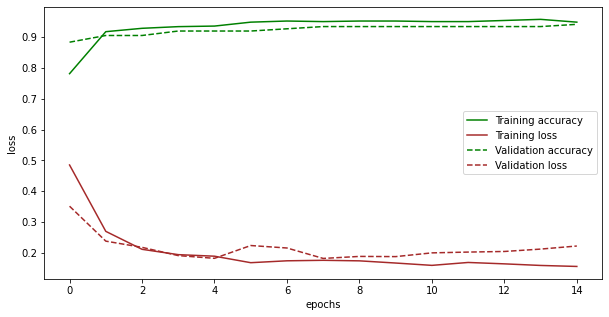

In [32]:
vis_evl(hist)

###### Green dots are target 🎯 values AND red dots are predictions of DL model

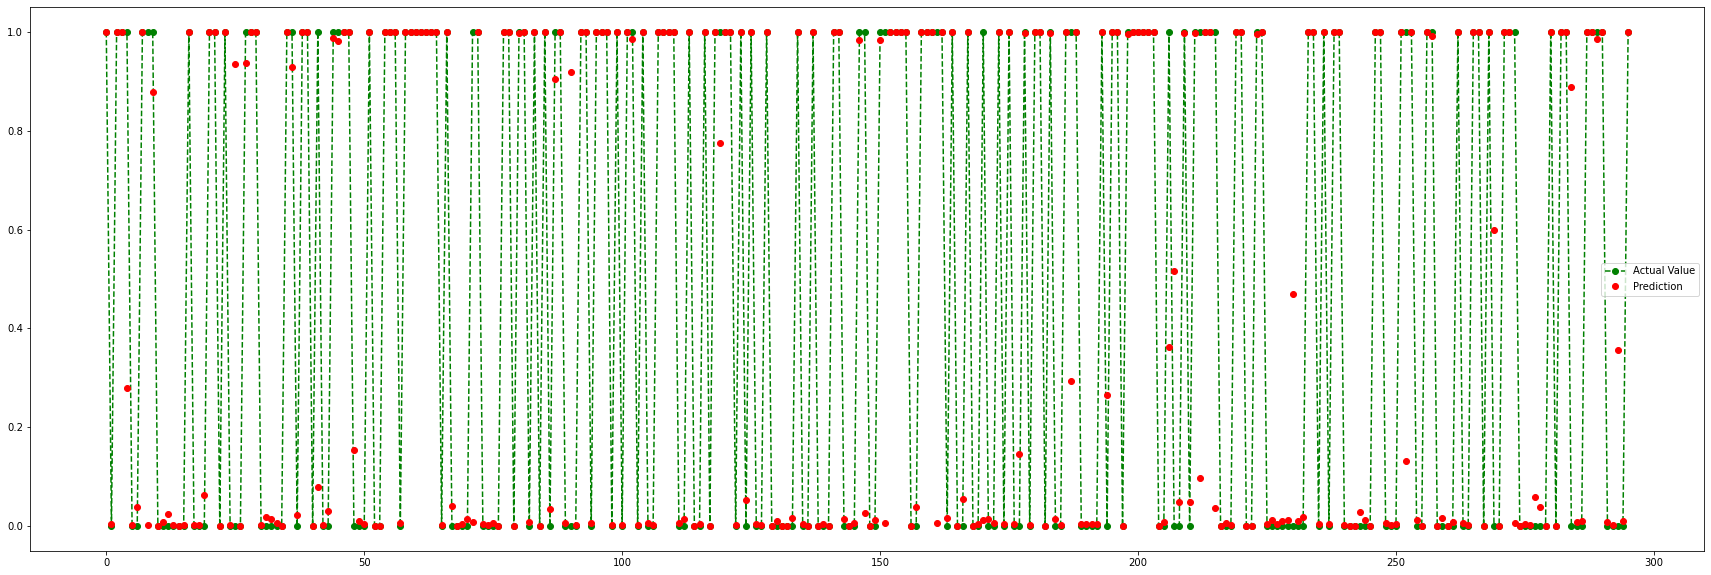

In [33]:
pre_tar(p, label_y)

In [34]:
def pred_frame(pre_val,tar_val):
    #DataFrame
    dd = pd.DataFrame(tar_val, columns=['Target'])
    dd['Predict_rounded'] = np.round(pre_val)
    dd['Prediction']=pre_val
#     dd['Percentage']=(dd.Prediction / dd.Target)*100
    
    display(dd)

In [35]:
pred_frame(p, label_y)

,Target,Predict_rounded,Prediction
0,1,1.0,0.999937
1,0,0.0,0.003434
2,1,1.0,1.000000
3,1,1.0,0.999941
4,1,0.0,0.280115
5,0,0.0,0.003073
6,0,0.0,0.039045
7,1,1.0,1.000000
8,1,0.0,0.002410
9,1,1.0,0.879369
